In [2]:
from __future__ import absolute_import, division, print_function

# First exploration

## Imports

In [3]:
import json
import datetime
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline



## Duration of all rides

### SQL

### Read output data

In [22]:
data_dir = os.path.join(os.getcwd(),'..','..','data')

df = pd.read_csv(os.path.join(data_dir,'results-20170126-141721.csv'))


In [33]:
df

,yr,mth,trips_total,date
0,2013,7,841814103,2013-07-01
1,2013,8,981498245,2013-08-01
2,2013,9,936116179,2013-09-01
3,2013,10,856750338,2013-10-01
4,2013,11,521213583,2013-11-01
5,2013,12,333806443,2013-12-01
6,2014,1,220484271,2014-01-01
7,2014,2,196536084,2014-02-01
8,2014,3,314213045,2014-03-01
9,2014,4,557893275,2014-04-01


In [24]:
# convert year and month to datetime object
df['date'] = df['yr'].apply(str) + '-' + df['mth'].apply(str)

In [25]:
df.shape[0]

39

In [26]:
for i in range(df.shape[0]):
    tmp = df['date'].iloc[i]
    df['date'].iloc[i] = pd.datetime.strptime(tmp,'%Y-%m')

In [29]:
df['date'] = df['date'].apply(pd.to_datetime)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
yr             39 non-null int64
mth            39 non-null int64
trips_total    39 non-null int64
date           39 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.3 KB


## Additional data

The data above only go until September 2016. Add Data for Oct-Dec 2016. Taken from the citibike website

In [35]:
df_add = pd.read_csv(os.path.join(data_dir,'data-gRmSF.csv'))
df_add.head()

,Date,Trips over the past 24-hours (midnight to 11:59pm),Cumulative trips (since launch):,Miles traveled today (midnight to 11:59 pm),Miles traveled to date:,Total Annual Members (All Time),24-Hour Passes Purchased (midnight to 11:59 pm),3-Day Passes Purchased (midnight to 11:59 pm)
0,10/1/2016,39809,"34,659,659",91771,"67,278,343",200544,2017,133
1,10/2/2016,41018,"34,700,677",100425,"67,378,768",200664,2147,119
2,10/3/2016,56369,"34,757,046",116682,"67,495,450",200829,1514,183
3,10/4/2016,60196,"34,817,242",123551,"67,619,001",200954,1035,144
4,10/5/2016,65031,"34,882,273",126942,"67,745,943",201115,1240,160


## Plot timeline

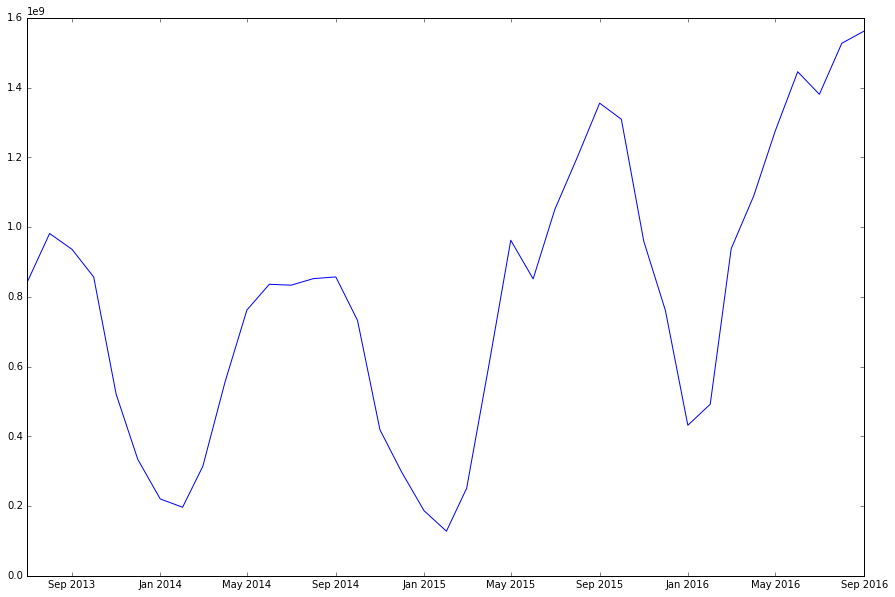

In [36]:
dates = df['date'].tolist()
trips = df['trips_total'].tolist()
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates,trips)